In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
data = pd.read_csv("t20.csv")
data

,match_id,series_id,match_details,result,scores,date,venue,round,home,away,...,innings1_wickets,innings1_overs_batted,innings1_overs,innings2,innings2_runs,innings2_wickets,innings2_overs_batted,innings2_overs,D/L_method,target
0,304744,124121,North Group:Durham v Nottinghamshire at Cheste...,Durham won by 6 wickets (with 5 balls remaining),Nottinghamshire 157/7 (20/20 ov); Durham 160/4...,13-06-2003,Chester-le-Street,North Group,Durham,Nottinghamshire,...,7.0,20.0,20.0,Durham,160.0,4.0,19.1,20.0,NaN,NaN
1,129610,124121,South Group:Hampshire v Sussex at Southampton-...,Hampshire won by 5 runs,Hampshire 153 (19.4/20 ov); Sussex 148/7 (20/2...,13-06-2003,Southampton,South Group,Hampshire,Sussex,...,10.0,19.4,20.0,Sussex,148.0,7.0,20.0,20.0,NaN,NaN
2,129597,124121,Midlands/Wales/West Group:Somerset v Warwicksh...,Warwickshire won by 19 runs,Warwickshire 188/7 (20/20 ov); Somerset 169 (2...,13-06-2003,Taunton,Midlands/Wales/West Group,Somerset,Warwickshire,...,7.0,20.0,20.0,Somerset,169.0,10.0,20.0,20.0,NaN,NaN
3,304745,124121,South Group:Surrey v Middlesex at The Oval- Ju...,Surrey won by 4 wickets (with 4 balls remaining),Middlesex 155 (20/20 ov); Surrey 158/6 (19.2/2...,13-06-2003,The Oval,South Group,Surrey,Middlesex,...,10.0,20.0,20.0,Surrey,158.0,6.0,19.2,20.0,NaN,NaN
4,304746,124121,Midlands/Wales/West Group:Worcestershire v Nor...,Worcestershire won by 1 wicket (with 2 balls r...,Northamptonshire 150/9 (20/20 ov); Worcestersh...,13-06-2003,Worcester,Midlands/Wales/West Group,Worcestershire,Northamptonshire,...,9.0,20.0,20.0,Worcestershire,151.0,9.0,19.4,20.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,1083450,1083439,2nd T20I:Sri Lanka v Bangladesh at Colombo (RP...,Bangladesh won by 45 runs,Bangladesh 176/9 (20/20 ov); Sri Lanka 131 (18...,06-04-2017,Colombo (RPS),2nd T20I,Sri Lanka,Bangladesh,...,9.0,20.0,20.0,Sri Lanka,131.0,10.0,18.0,20.0,NaN,NaN
6413,1082591,1078425,1st match:Sunrisers Hyderabad v Royal Challeng...,Sunrisers Hyderabad won by 35 runs,Sunrisers Hyderabad 207/4 (20/20 ov); Royal Ch...,05-04-2017,Hyderabad (Deccan),1st match,Sunrisers Hyderabad,Royal Challengers Bangalore,...,4.0,20.0,20.0,Royal Challengers Bangalore,172.0,10.0,19.4,20.0,NaN,NaN
6414,1082592,1078425,2nd match:Rising Pune Supergiant v Mumbai Indi...,Rising Pune Supergiant won by 7 wickets (with ...,Mumbai Indians 184/8 (20/20 ov); Rising Pune S...,06-04-2017,Pune,2nd match,Rising Pune Supergiant,Mumbai Indians,...,8.0,20.0,20.0,Rising Pune Supergiant,187.0,3.0,19.5,20.0,NaN,NaN
6415,1082593,1078425,3rd match:Gujarat Lions v Kolkata Knight Rider...,Kolkata Knight Riders won by 10 wickets (with ...,Gujarat Lions 183/4 (20/20 ov); Kolkata Knight...,07-04-2017,Rajkot,3rd match,Gujarat Lions,Kolkata Knight Riders,...,4.0,20.0,20.0,Kolkata Knight Riders,184.0,0.0,14.5,20.0,NaN,NaN


In [4]:
#Lets check for duplicates 
data.duplicated().sum()

0

In [5]:
#lets remove the duplicates 
data.drop_duplicates(inplace=True) #inplace=True modifies the original dataframe

In [6]:
#Lets check for null/nan/missing values in the data 
data.isnull().sum()

match_id                    0
series_id                   0
match_details               0
result                     14
scores                    266
date                        0
venue                       0
round                    1274
home                        0
away                        0
winner                     14
win_by_runs              3486
win_by_wickets           3413
balls_remaining          3448
innings1                  266
innings1_runs             266
innings1_wickets          266
innings1_overs_batted     266
innings1_overs            266
innings2                  347
innings2_runs             347
innings2_wickets          347
innings2_overs_batted     347
innings2_overs            347
D/L_method               6184
target                   6186
dtype: int64

In [7]:
data.shape

(6417, 26)

In [8]:
data.nunique()

match_id                 6417
series_id                 371
match_details            6417
result                   5470
scores                   6151
date                     2273
venue                     205
round                     518
home                      321
away                      315
winner                    334
win_by_runs               137
win_by_wickets             10
balls_remaining            82
innings1                  330
innings1_runs             222
innings1_wickets           11
innings1_overs_batted      81
innings1_overs             26
innings2                  329
innings2_runs             213
innings2_wickets           11
innings2_overs_batted     113
innings2_overs             53
D/L_method                  1
target                    125
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6417 entries, 0 to 6416
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   match_id               6417 non-null   int64  
 1   series_id              6417 non-null   int64  
 2   match_details          6417 non-null   object 
 3   result                 6403 non-null   object 
 4   scores                 6151 non-null   object 
 5   date                   6417 non-null   object 
 6   venue                  6417 non-null   object 
 7   round                  5143 non-null   object 
 8   home                   6417 non-null   object 
 9   away                   6417 non-null   object 
 10  winner                 6403 non-null   object 
 11  win_by_runs            2931 non-null   float64
 12  win_by_wickets         3004 non-null   float64
 13  balls_remaining        2969 non-null   float64
 14  innings1               6151 non-null   object 
 15  inni

In [10]:
data.describe() # prints the statistics of the numerical columns in the data

,match_id,series_id,win_by_runs,win_by_wickets,balls_remaining,innings1_runs,innings1_wickets,innings1_overs_batted,innings1_overs,innings2_runs,innings2_wickets,innings2_overs_batted,innings2_overs,D/L_method,target
count,6.417000e+03,6.417000e+03,2931.000000,3004.000000,2969.000000,6151.000000,6151.000000,6151.000000,6151.000000,6070.000000,6070.000000,6070.000000,6070.000000,233.0,231.000000
mean,6.000441e+05,5.879816e+05,31.320710,6.089214,13.978107,151.409527,6.577630,19.523199,19.738612,136.125371,5.998847,17.862537,19.530659,1.0,102.528139
std,2.302316e+05,2.387841e+05,26.838237,1.996341,14.664918,32.986924,2.152355,1.924720,1.510632,31.880776,2.923842,3.075877,2.108147,0.0,40.406713
min,1.295970e+05,1.241210e+05,1.000000,1.000000,0.000000,1.000000,0.000000,0.200000,5.000000,0.000000,0.000000,0.100000,5.000000,1.0,20.000000
25%,4.249410e+05,4.200050e+05,11.000000,5.000000,4.000000,131.000000,5.000000,20.000000,20.000000,117.000000,4.000000,17.200000,20.000000,1.0,72.000000
50%,5.673530e+05,5.642800e+05,24.000000,6.000000,9.000000,152.000000,7.000000,20.000000,20.000000,138.000000,6.000000,19.100000,20.000000,1.0,98.000000
75%,7.760790e+05,7.754450e+05,45.000000,8.000000,19.000000,173.000000,8.000000,20.000000,20.000000,157.000000,9.000000,20.000000,20.000000,1.0,129.000000
max,1.085496e+06,1.083439e+06,172.000000,10.000000,100.000000,263.000000,10.000000,20.000000,20.000000,248.000000,10.000000,20.000000,20.000000,1.0,233.000000


## UNIVARIATE ANALYSIS

In [11]:
data.columns

Index(['match_id', 'series_id', 'match_details', 'result', 'scores', 'date',
       'venue', 'round', 'home', 'away', 'winner', 'win_by_runs',
       'win_by_wickets', 'balls_remaining', 'innings1', 'innings1_runs',
       'innings1_wickets', 'innings1_overs_batted', 'innings1_overs',
       'innings2', 'innings2_runs', 'innings2_wickets',
       'innings2_overs_batted', 'innings2_overs', 'D/L_method', 'target'],
      dtype='object')

In [12]:
num_cols = [col for col in data.columns if data[col].dtypes=="int64" or  data[col].dtypes=="float64"]
num_cols

['match_id',
 'series_id',
 'win_by_runs',
 'win_by_wickets',
 'balls_remaining',
 'innings1_runs',
 'innings1_wickets',
 'innings1_overs_batted',
 'innings1_overs',
 'innings2_runs',
 'innings2_wickets',
 'innings2_overs_batted',
 'innings2_overs',
 'D/L_method',
 'target']

## Numerical column analysis

## 1) innings1_wickets

In [15]:
data["innings1_wickets"].value_counts()

innings1_wickets
7.0     1040
6.0      999
5.0      878
8.0      820
10.0     697
9.0      623
4.0      609
3.0      317
2.0      115
1.0       41
0.0       12
Name: count, dtype: int64

<Axes: xlabel='innings1_wickets', ylabel='Count'>

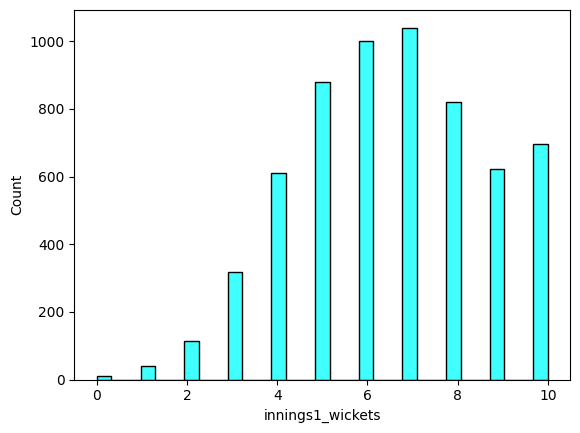

In [16]:

sns.histplot(data=data,x="innings1_wickets",color="cyan")

## 2)innings1_overs

<Axes: xlabel='innings1_overs', ylabel='Count'>

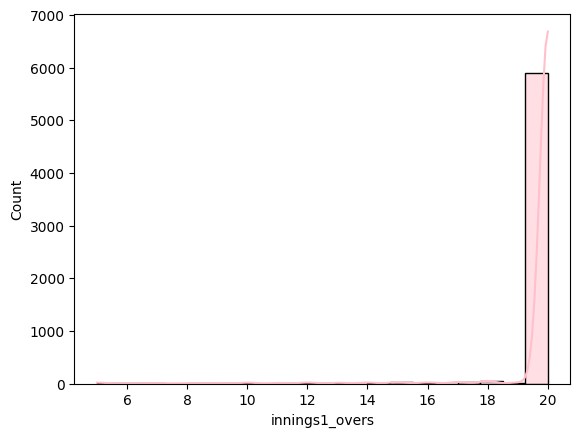

In [17]:
sns.histplot(data=data,x="innings1_overs",bins=20,color="pink",kde=True)

## 3)innings2_runs

<Axes: xlabel='innings2_runs', ylabel='Count'>

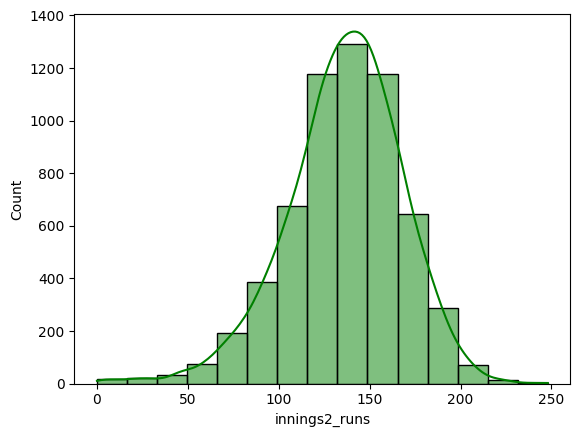

In [18]:
sns.histplot(data=data,x="innings2_runs",bins=15,color="green",kde=True)

C:\Users\roman\AppData\Local\Temp\ipykernel_14904\1047273280.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x="innings2_runs",palette=["red","green"])
C:\Users\roman\AppData\Local\Temp\ipykernel_14904\1047273280.py:1: UserWarning: 
The palette list has fewer values (2) than needed (213) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=data,x="innings2_runs",palette=["red","green"])


<Axes: xlabel='innings2_runs', ylabel='count'>

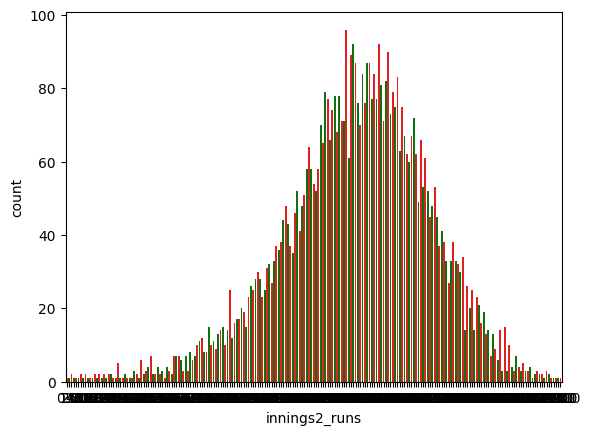

In [20]:
sns.countplot(data=data,x="innings2_runs",palette=["red","green"])

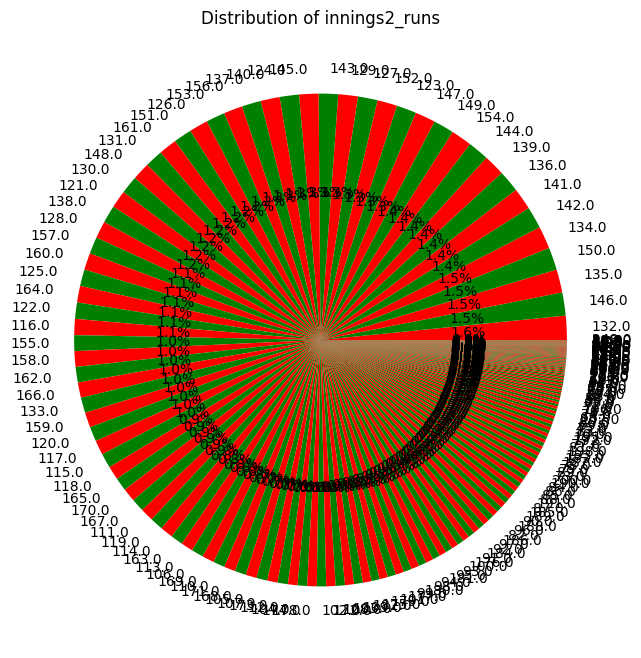

In [21]:
counts = data["innings2_runs"].value_counts()
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=["red", "green"])
plt.title('Distribution of innings2_runs')
plt.show()

<Axes: xlabel='innings2_runs', ylabel='count'>

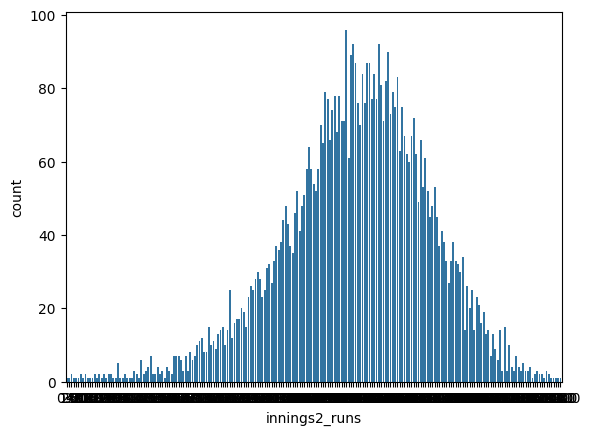

In [22]:
sns.countplot(data=data,x="innings2_runs")

## Categorical column analysis

In [23]:
cat_cols = [col for col in data.columns if data[col].dtypes=="object"]
cat_cols

['match_details',
 'result',
 'scores',
 'date',
 'venue',
 'round',
 'home',
 'away',
 'winner',
 'innings1',
 'innings2']

## 1) Match details

In [24]:
data.match_details.value_counts()

match_details
North Group:Durham v Nottinghamshire at Chester-le-Street- Jun 13, 2003                  1
Coastal Pool:Boland v Border at Paarl- Feb 16, 2014                                      1
Coastal Pool:KwaZulu-Natal Inland v Western Province at Pietermaritzburg- Mar 2, 2014    1
Coastal Pool:Boland v Eastern Province at Paarl- Mar 2, 2014                             1
Inland Pool:Easterns v Namibia at Benoni- Mar 1, 2014                                    1
                                                                                        ..
West Zone:Baroda v Gujarat at Vadodara- Oct 22, 2010                                     1
Central Zone:Railways v Vidarbha at Jaipur- Oct 21, 2010                                 1
North Zone:Haryana v Services at Delhi- Oct 21, 2010                                     1
Central Zone:Rajasthan v Uttar Pradesh at Jaipur- Oct 21, 2010                           1
4th match:Kings XI Punjab v Rising Pune Supergiant at Indore- Apr 8, 2017   

## BIVARIATE ANALYSIS

In [31]:
from sklearn.preprocessing import MinMaxScaler

# Select columns to normalize
columns_to_normalize = ['innings1_wickets', 'innings1_overs', 'innings2_runs']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the selected columns
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Display the normalized data
print(data.head())

   match_id  series_id                                      match_details  \
0    304744     124121  North Group:Durham v Nottinghamshire at Cheste...   
1    129610     124121  South Group:Hampshire v Sussex at Southampton-...   
2    129597     124121  Midlands/Wales/West Group:Somerset v Warwicksh...   
3    304745     124121  South Group:Surrey v Middlesex at The Oval- Ju...   
4    304746     124121  Midlands/Wales/West Group:Worcestershire v Nor...   

                                              result  \
0   Durham won by 6 wickets (with 5 balls remaining)   
1                            Hampshire won by 5 runs   
2                        Warwickshire won by 19 runs   
3   Surrey won by 4 wickets (with 4 balls remaining)   
4  Worcestershire won by 1 wicket (with 2 balls r...   

                                              scores        date  \
0  Nottinghamshire 157/7 (20/20 ov); Durham 160/4...  13-06-2003   
1  Hampshire 153 (19.4/20 ov); Sussex 148/7 (20/2...  13-06-2003

## performed various data analysis on this  dataset